In [199]:
# This project detects payment fraud and compares several models including one unsupervised model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest


In [2]:
# Data is in several files which are imported
accounts_data = pd.read_csv ("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Customer Profiles/account_activity.csv")

In [3]:
customers_data= pd.read_csv ("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Customer Profiles/customer_data.csv")

In [4]:
is_fraud= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Fraudulent Patterns/fraud_indicators.csv")

In [5]:
is_suspicious= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Fraudulent Patterns/suspicious_activity.csv")

In [6]:
merchant_data= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Merchant Information/merchant_data.csv")

In [7]:
transaction_category= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Merchant Information/transaction_category_labels.csv")

In [8]:
amount_data= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Transaction Amounts/amount_data.csv")

In [9]:
anomaly_score=pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Transaction Amounts/anomaly_scores.csv")

In [10]:
transaction_data= pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Transaction Data/transaction_metadata.csv")

In [11]:
transaction_rec=pd.read_csv("C:/Users/vincent.chaparadza/Desktop/Dataset/Fraud_Detection/Data/Transaction Data/transaction_records.csv")

In [12]:
accounts_data.head()

,CustomerID,AccountBalance,LastLogin
0,1001,9507.272060,2022-01-01
1,1002,7408.704536,2022-01-02
2,1003,1715.321989,2022-01-03
3,1004,3101.509134,2022-01-04
4,1005,5405.766914,2022-01-05


In [13]:
accounts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   AccountBalance  1000 non-null   float64
 2   LastLogin       1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [14]:
customers_data.head()

,CustomerID,Name,Age,Address
0,1001,Customer 1001,54,Address 1001
1,1002,Customer 1002,35,Address 1002
2,1003,Customer 1003,40,Address 1003
3,1004,Customer 1004,30,Address 1004
4,1005,Customer 1005,46,Address 1005


In [15]:
is_fraud.head()

,TransactionID,FraudIndicator
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [16]:
is_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   TransactionID   1000 non-null   int64
 1   FraudIndicator  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [17]:
is_suspicious.head()

,CustomerID,SuspiciousFlag
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0


In [18]:
merchant_data.head()

,MerchantID,MerchantName,Location
0,2001,Merchant 2001,Location 2001
1,2002,Merchant 2002,Location 2002
2,2003,Merchant 2003,Location 2003
3,2004,Merchant 2004,Location 2004
4,2005,Merchant 2005,Location 2005


In [19]:
merchant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MerchantID    1000 non-null   int64 
 1   MerchantName  1000 non-null   object
 2   Location      1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [20]:
transaction_category.head()

,TransactionID,Category
0,1,Other
1,2,Online
2,3,Travel
3,4,Travel
4,5,Other


In [21]:
transaction_data.head()

,TransactionID,Timestamp,MerchantID
0,1,2022-01-01 00:00:00,2701
1,2,2022-01-01 01:00:00,2070
2,3,2022-01-01 02:00:00,2238
3,4,2022-01-01 03:00:00,2879
4,5,2022-01-01 04:00:00,2966


In [22]:
transaction_rec.head()

,TransactionID,Amount,CustomerID
0,1,55.530334,1952
1,2,12.881180,1027
2,3,50.176322,1955
3,4,41.634001,1796
4,5,78.122853,1946


In [23]:
amount_data.head()

,TransactionID,TransactionAmount
0,1,79.413607
1,2,12.053087
2,3,33.310357
3,4,46.121117
4,5,54.051618


In [24]:
anomaly_score.head()

,TransactionID,AnomalyScore
0,1,0.686699
1,2,0.081749
2,3,0.023857
3,4,0.876994
4,5,0.034059


In [25]:
# merging customer data
customers = pd.merge(accounts_data,customers_data, on = 'CustomerID')

In [26]:
customers= pd.merge(customers, is_suspicious, on = 'CustomerID')

In [27]:
customers.head()

,CustomerID,AccountBalance,LastLogin,Name,Age,Address,SuspiciousFlag
0,1001,9507.272060,2022-01-01,Customer 1001,54,Address 1001,0
1,1002,7408.704536,2022-01-02,Customer 1002,35,Address 1002,0
2,1003,1715.321989,2022-01-03,Customer 1003,40,Address 1003,0
3,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,0
4,1005,5405.766914,2022-01-05,Customer 1005,46,Address 1005,0


In [28]:
# merging transaction data
transactions = pd.merge(amount_data,transaction_category, on ='TransactionID')

In [29]:
transactions= pd.merge(transactions,transaction_data, on ='TransactionID')

In [30]:
transactions= pd.merge(transactions,transaction_rec, on = 'TransactionID')

In [31]:
transactions= pd.merge(transactions,is_fraud, on = 'TransactionID')

In [32]:
transactions=pd.merge(transactions, anomaly_score, on = 'TransactionID')

In [33]:
transactions.head()

,TransactionID,TransactionAmount,Category,Timestamp,MerchantID,Amount,CustomerID,FraudIndicator,AnomalyScore
0,1,79.413607,Other,2022-01-01 00:00:00,2701,55.530334,1952,0,0.686699
1,2,12.053087,Online,2022-01-01 01:00:00,2070,12.881180,1027,0,0.081749
2,3,33.310357,Travel,2022-01-01 02:00:00,2238,50.176322,1955,0,0.023857
3,4,46.121117,Travel,2022-01-01 03:00:00,2879,41.634001,1796,0,0.876994
4,5,54.051618,Other,2022-01-01 04:00:00,2966,78.122853,1946,0,0.034059


In [34]:
# merging customer and transaction data into one file
cust_trans= pd.merge(customers,transactions, on ='CustomerID')
cust_trans= pd.merge(cust_trans,merchant_data, on= 'MerchantID')

In [35]:
cust_trans.head()

,CustomerID,AccountBalance,LastLogin,Name,Age,Address,SuspiciousFlag,TransactionID,TransactionAmount,Category,Timestamp,MerchantID,Amount,FraudIndicator,AnomalyScore,MerchantName,Location
0,1001,9507.272060,2022-01-01,Customer 1001,54,Address 1001,0,787,87.375444,Food,2022-02-02 18:00:00,2627,33.670626,0,0.030921,Merchant 2627,Location 2627
1,1441,7268.827350,2023-03-17,Customer 1441,37,Address 1441,0,257,71.337967,Food,2022-01-11 16:00:00,2627,23.740319,0,0.555628,Merchant 2627,Location 2627
2,1003,1715.321989,2022-01-03,Customer 1003,40,Address 1003,0,641,46.044172,Travel,2022-01-27 16:00:00,2496,30.980239,0,0.961552,Merchant 2496,Location 2496
3,1004,3101.509134,2022-01-04,Customer 1004,30,Address 1004,0,450,85.085061,Other,2022-01-19 17:00:00,2184,11.167088,0,0.525809,Merchant 2184,Location 2184
4,1770,6847.490921,2024-02-09,Customer 1770,36,Address 1770,1,613,33.420638,Other,2022-01-26 12:00:00,2184,16.182847,0,0.260799,Merchant 2184,Location 2184


In [36]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   int64  
 1   AccountBalance     1000 non-null   float64
 2   LastLogin          1000 non-null   object 
 3   Name               1000 non-null   object 
 4   Age                1000 non-null   int64  
 5   Address            1000 non-null   object 
 6   SuspiciousFlag     1000 non-null   int64  
 7   TransactionID      1000 non-null   int64  
 8   TransactionAmount  1000 non-null   float64
 9   Category           1000 non-null   object 
 10  Timestamp          1000 non-null   object 
 11  MerchantID         1000 non-null   int64  
 12  Amount             1000 non-null   float64
 13  FraudIndicator     1000 non-null   int64  
 14  AnomalyScore       1000 non-null   float64
 15  MerchantName       1000 non-null   object 
 16  Location           1000 n

In [37]:
cust_trans.describe()

,CustomerID,AccountBalance,Age,SuspiciousFlag,TransactionID,TransactionAmount,MerchantID,Amount,FraudIndicator,AnomalyScore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1496.626000,5715.455931,39.848000,0.025000,500.500000,55.853826,2504.701000,55.394871,0.045000,0.492282
std,289.229047,2540.517262,13.074932,0.156203,288.819436,26.093606,288.414883,25.070809,0.207408,0.288423
min,1001.000000,1056.301181,18.000000,0.000000,1.000000,10.057864,2001.000000,10.006933,0.000000,0.000234
25%,1239.000000,3489.554711,29.000000,0.000000,250.750000,33.875129,2254.500000,34.502315,0.000000,0.251802
50%,1501.000000,5753.007775,39.000000,0.000000,500.500000,55.958313,2500.500000,57.844325,0.000000,0.490242
75%,1739.250000,7925.710167,51.000000,0.000000,750.250000,77.589391,2761.250000,75.858576,0.000000,0.741888
max,2000.000000,9999.776239,64.000000,1.000000,1000.000000,99.784323,3000.000000,99.887410,1.000000,0.999047


In [38]:
# checking for duplicates
duplicate_rows = cust_trans[cust_trans.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [CustomerID, AccountBalance, LastLogin, Name, Age, Address, SuspiciousFlag, TransactionID, TransactionAmount, Category, Timestamp, MerchantID, Amount, FraudIndicator, AnomalyScore, MerchantName, Location]
Index: []


In [39]:
# Define high-value customers as those with above-average transaction amounts
average_transaction = cust_trans['TransactionAmount'].mean()
high_value_customers = cust_trans[cust_trans['TransactionAmount'] > average_transaction]



In [40]:
# Get unique customer ids
unique_high_value_customers = high_value_customers['CustomerID'].unique()
print(f"High-value customers: {len(unique_high_value_customers)}")


High-value customers: 396


In [41]:
# Filter for fraud transaction above the average transaction value
fraud_above_avg = cust_trans[(cust_trans['TransactionAmount'] > average_transaction) & 
                 (cust_trans['FraudIndicator']==1)]

Text(0.5, 0, 'Accounts')

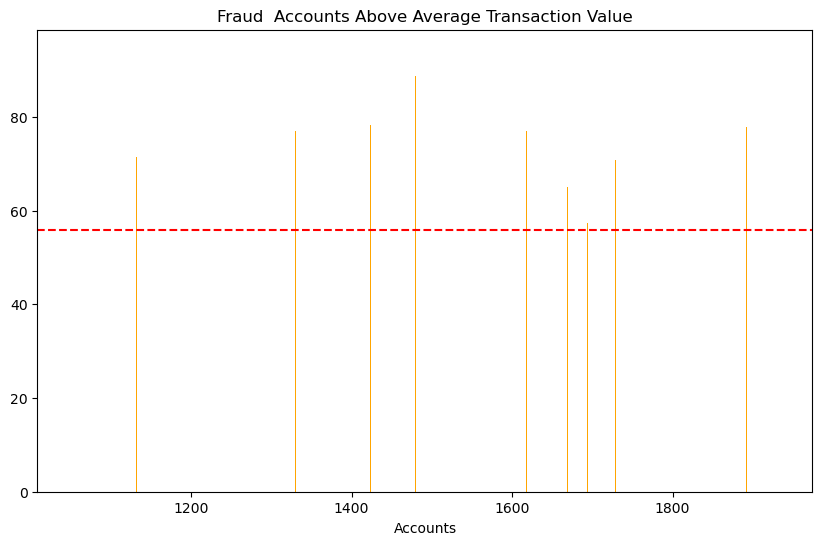

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fraud_above_avg['CustomerID'], fraud_above_avg['TransactionAmount'], color='orange')
plt.axhline(y=average_transaction, color='r', linestyle='--', label='Average Transaction Value')
plt.title('Fraud  Accounts Above Average Transaction Value')
plt.xlabel('Accounts')

In [43]:
# filter fraud transaction below average transaction value
fraud_below_avg = cust_trans[(cust_trans['TransactionAmount']<= average_transaction) & (cust_trans['FraudIndicator'])==1]


Text(0.5, 0, 'Accounts')

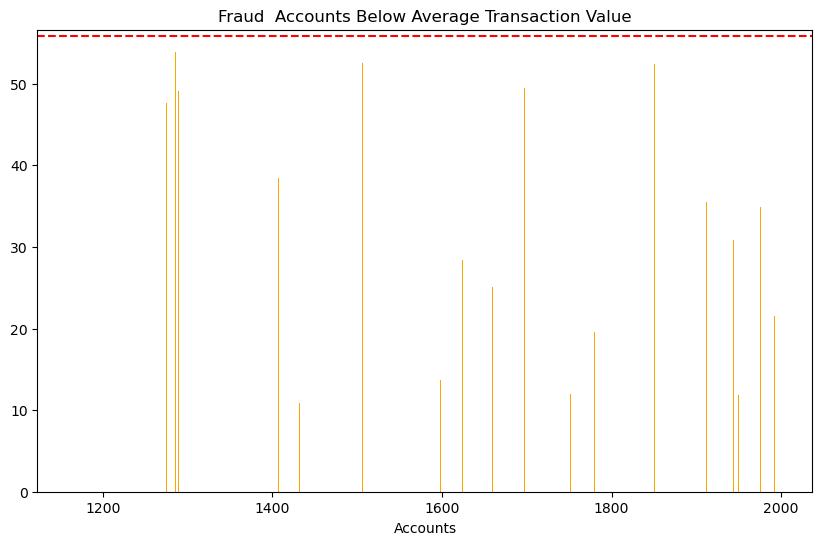

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fraud_below_avg['CustomerID'], fraud_below_avg['TransactionAmount'], color='orange')
plt.axhline(y=average_transaction, color='r', linestyle='--', label='Average Transaction Value')
plt.title('Fraud  Accounts Below Average Transaction Value')
plt.xlabel('Accounts')
# fraudulent transactions are below and above the average transaction value

In [45]:
# filter fraud accounts

fraud_acc= cust_trans[cust_trans['FraudIndicator']==1]





In [46]:
# Count occurrences of each account
fraud_account_counts = fraud_acc.value_counts()

In [47]:
# Filter accounts used more than once
frequent_fraud_accounts = fraud_account_counts[fraud_account_counts > 1]
print(frequent_fraud_accounts)

Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

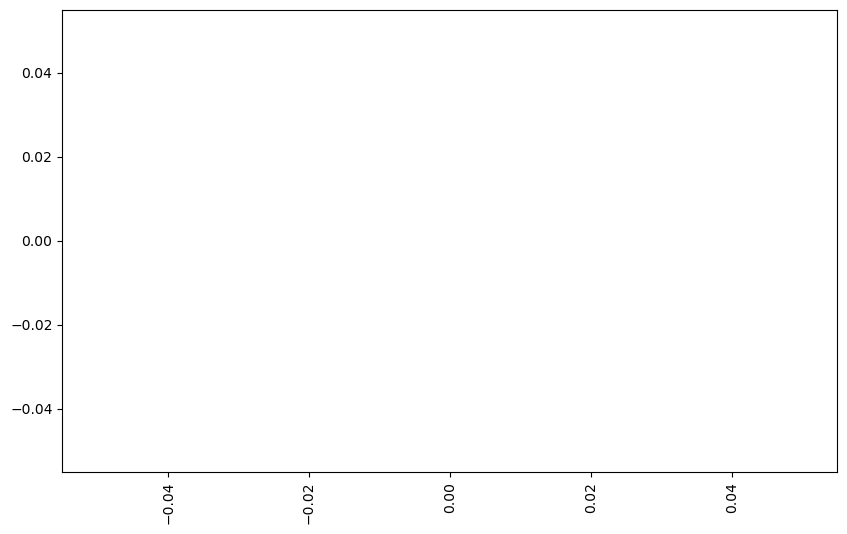

In [48]:

# Plotting
plt.figure(figsize=(10, 6))
frequent_fraud_accounts.plot(kind='bar', color='orange')
plt.title('Accounts Used More Than Once for Fraud')
plt.xlabel('Accounts')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()
# no account is used more than once in fradulent transactions 

In [51]:
# Group by age and Fraud
Fraud_Age = cust_trans.groupby(['Age', 'FraudIndicator']).size().unstack(fill_value=0)



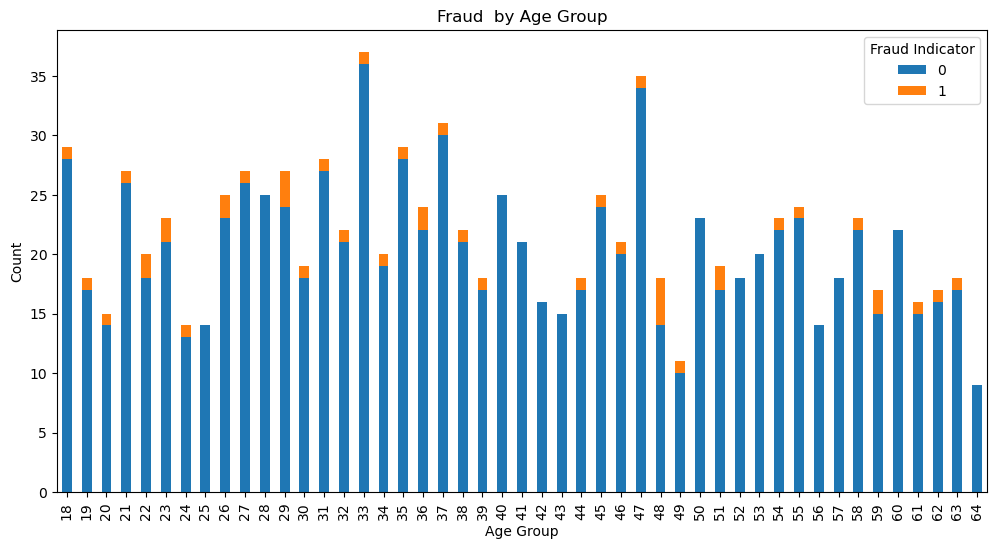

In [79]:
# Plotting
Fraud_Age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Fraud  by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator')
plt.show()
# fraud is dsitributed across all the age ranges

In [61]:
cust_trans['Timestamp'] = pd.to_datetime(cust_trans['Timestamp'])

In [62]:
cust_trans['LastLogin']=pd.to_datetime(cust_trans['LastLogin'])

In [63]:
# Group by transaction date and sum the transaction amounts
daily_fraud_transactions = fraud_acc.groupby('Timestamp')['TransactionAmount'].sum().reset_index()

C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


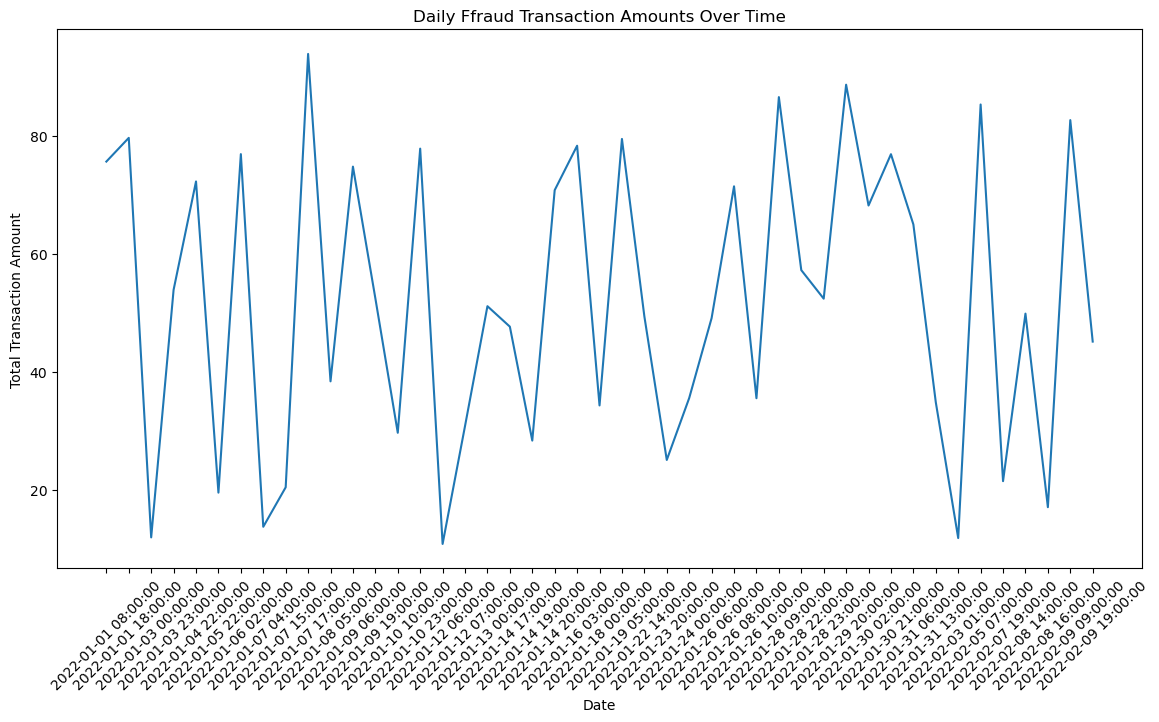

In [64]:
# Plotting daily transaction amounts
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_fraud_transactions, x='Timestamp', y='TransactionAmount')
plt.title('Daily Ffraud Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()
# daily fraud transactions range between 0 and 100 dollar daily

In [65]:
# Extract year and month from the transaction date
cust_trans['year_month'] = cust_trans['Timestamp'].dt.to_period('M')

In [66]:
fraud_acc['Timestamp']=pd.to_datetime(fraud_acc['Timestamp'])

C:\Users\vincent.chaparadza\AppData\Local\Temp\ipykernel_25420\4292557148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_acc['Timestamp']=pd.to_datetime(fraud_acc['Timestamp'])


In [67]:
# Extract the hour from the timestamp
fraud_acc['Hour'] = fraud_acc['Timestamp'].dt.hour

C:\Users\vincent.chaparadza\AppData\Local\Temp\ipykernel_25420\3273720851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_acc['Hour'] = fraud_acc['Timestamp'].dt.hour


In [68]:
cust_trans['Hour']= cust_trans['Timestamp'].dt.hour

In [69]:
# Count the number of fraud transactions per hour
fraud_counts_by_hour = fraud_acc['Hour'].value_counts().sort_index()

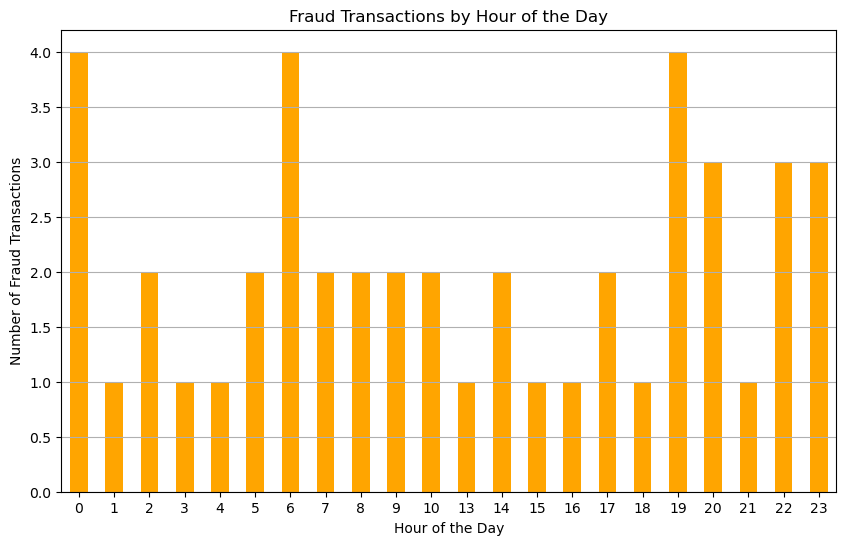

In [70]:
# Plotting
plt.figure(figsize=(10, 6))
fraud_counts_by_hour.plot(kind='bar', color='orange')
plt.title('Fraud Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# fraud transactions accur through out the day and night with slightly more occurring at night

In [71]:
# Group by category and count fraud transactions
fraud_counts_category = cust_trans[cust_trans['FraudIndicator']==1].groupby('Category').size()


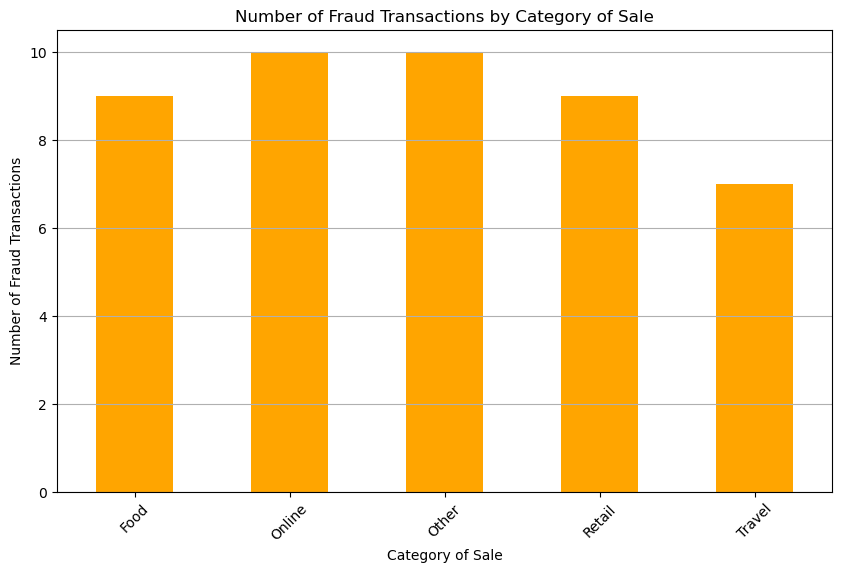

In [72]:
# Plotting
plt.figure(figsize=(10, 6))
fraud_counts_category.plot(kind='bar', color='orange')
plt.title('Number of Fraud Transactions by Category of Sale')
plt.xlabel('Category of Sale')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# fraud transactins occurs across all categories of sale

In [73]:
# Group by year_month and sum transaction amounts
monthly_transactions = cust_trans.groupby('year_month')['TransactionAmount'].sum().reset_index()

In [74]:
monthly_transactions

,year_month,TransactionAmount
0,2022-01,41920.881973
1,2022-02,13932.943918


C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: Invalid object type at position 0

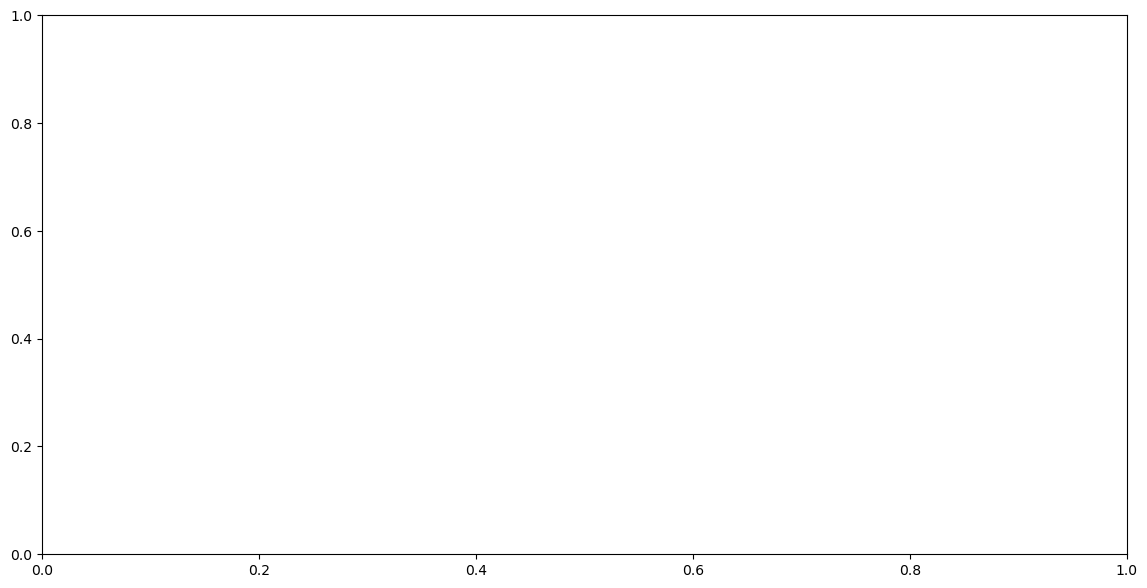

In [75]:
# Plotting monthly transaction amounts
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_transactions, x='year_month', y='TransactionAmount')
plt.title('Monthly Transaction Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Group by suspicion flag and fraud flag
suspicion_fraud_analysis = cust_trans.groupby(['SuspiciousFlag', 'FraudIndicator']).size().unstack(fill_value=0)



<Figure size 800x600 with 0 Axes>

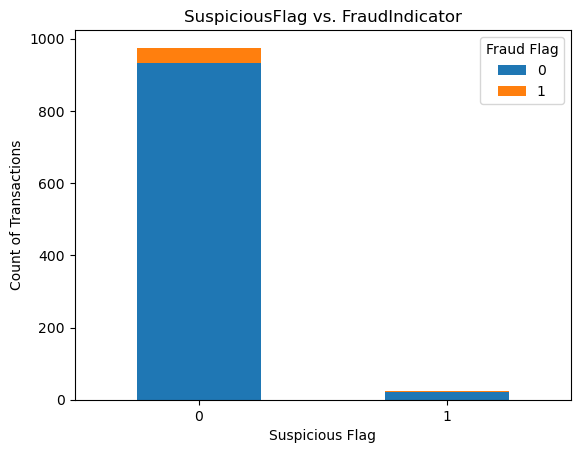

In [80]:
# Plotting
plt.figure(figsize=(8, 6))
suspicion_fraud_analysis.plot(kind='bar', stacked=True)
plt.title('SuspiciousFlag vs. FraudIndicator')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud Flag')
plt.xticks(rotation=0)
plt.show()
# suspicous flag not a good indactor of fraud

In [91]:
# Analyze fraud incidence by merchant name

fraud_by_merchant = cust_trans[cust_trans['FraudIndicator'] == 1].groupby('MerchantName')['TransactionAmount'].sum().reset_index()

In [92]:
fraud_by_merchant.head()

,MerchantName,TransactionAmount
0,Merchant 2022,86.590498
1,Merchant 2028,25.070084
2,Merchant 2038,49.416204
3,Merchant 2048,76.909955
4,Merchant 2057,11.829615


In [93]:
#fraud_by_merchant= fraud_by_location.sort_values(by = 'TransactionAmount', ascending= False)

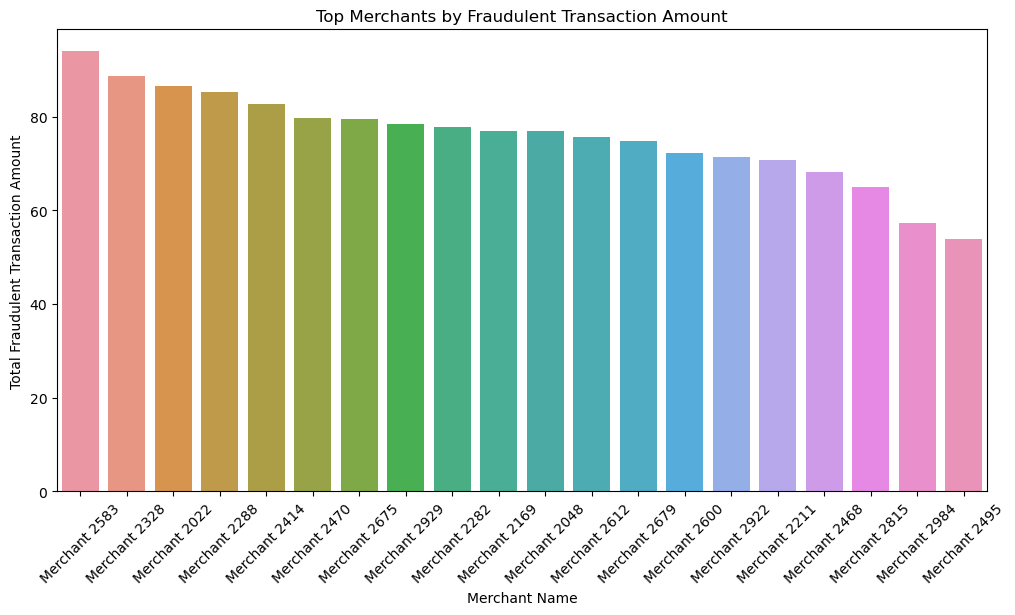

In [95]:
# Plotting top merchants with fraud incidents
top_fraud_merchants = fraud_by_merchant.sort_values(by='TransactionAmount', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_fraud_merchants,x= 'MerchantName', y='TransactionAmount')
plt.title('Top Merchants by Fraudulent Transaction Amount')
plt.xlabel('Merchant Name')
plt.ylabel('Total Fraudulent Transaction Amount')
plt.xticks(rotation=45)
plt.show()

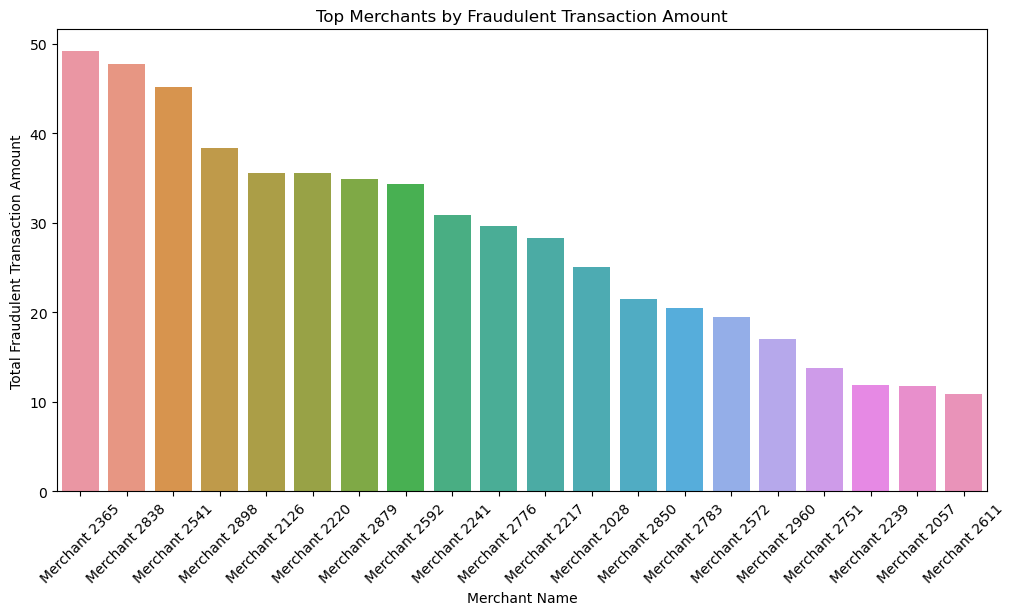

In [229]:
# Plotting bottom merchants with fraud incidents
bottom_fraud_merchants = fraud_by_merchant.sort_values(by='TransactionAmount', ascending=False).tail(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_fraud_merchants,x= 'MerchantName', y='TransactionAmount')
plt.title('Top Merchants by Fraudulent Transaction Amount')
plt.xlabel('Merchant Name')
plt.ylabel('Total Fraudulent Transaction Amount')
plt.xticks(rotation=45)
plt.show()
# all merchants have expeinced fraud but some higher values than others

In [232]:
# Analyze account balance of fraudulent transactions
fraud_balances = cust_trans[cust_trans['FraudIndicator'] == 1]['AccountBalance']

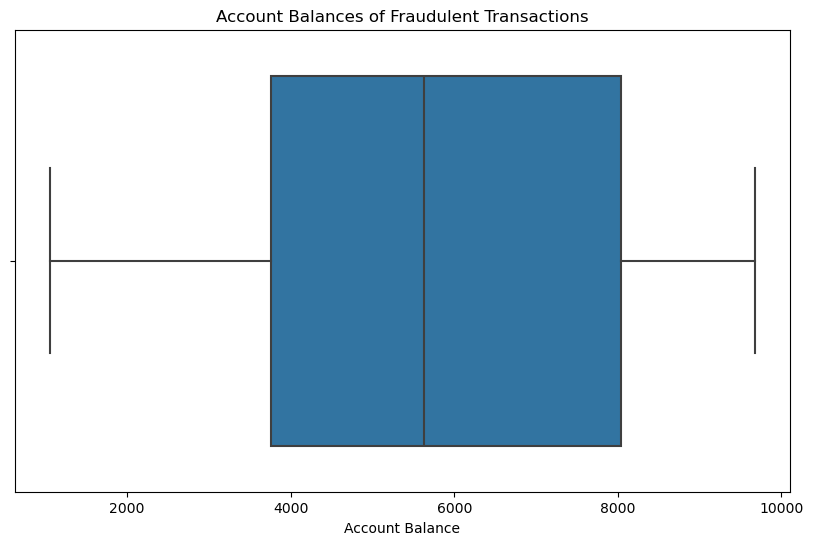

In [233]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=fraud_balances)
plt.title('Account Balances of Fraudulent Transactions')
plt.xlabel('Account Balance')
plt.show()
# no outliers in account balances with fraud

C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


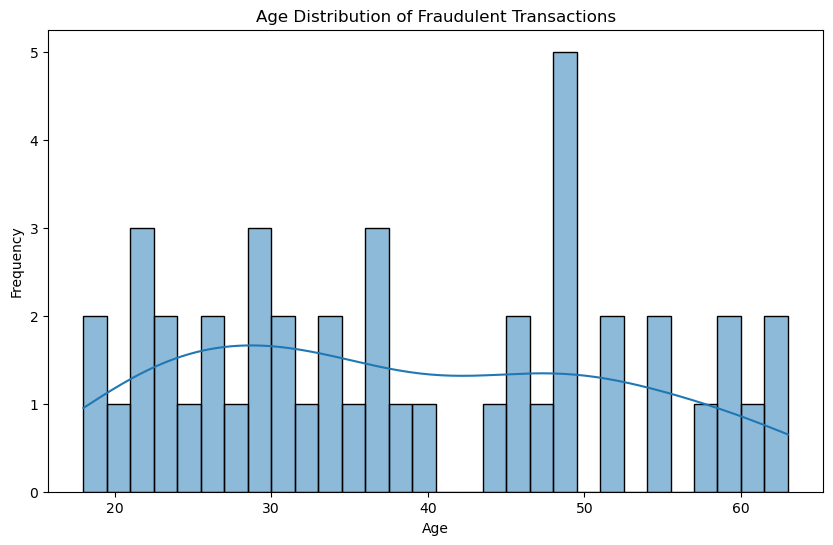

In [98]:
# Analyze age distribution for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(cust_trans[cust_trans['FraudIndicator'] == 1]['Age'], bins=30, kde=True)
plt.title('Age Distribution of Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [99]:
# Analyze fraud incidence by location
fraud_by_location = cust_trans[cust_trans['FraudIndicator'] == 1].groupby('Location')['TransactionAmount'].sum().reset_index()

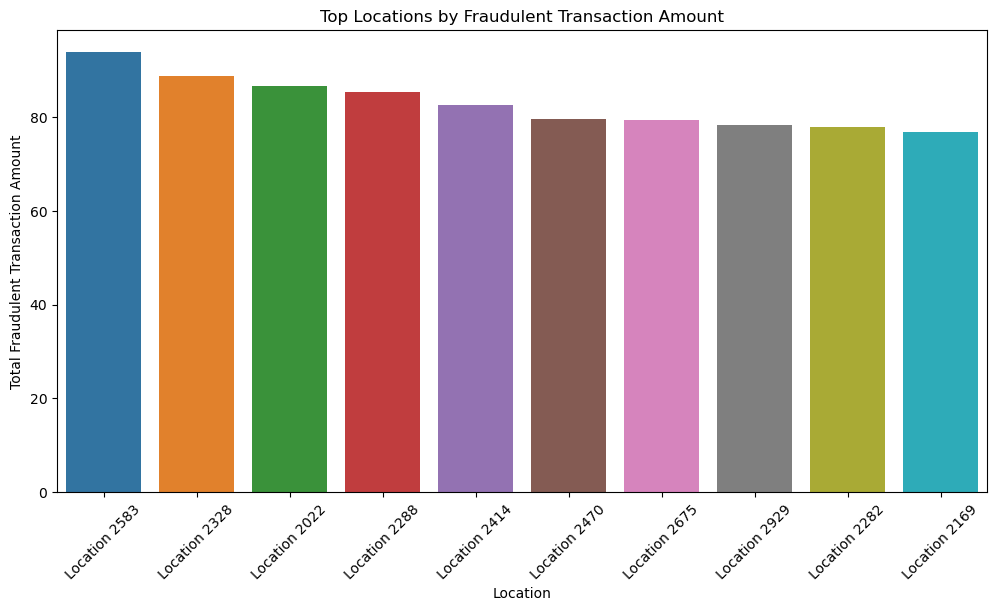

In [100]:
# Plotting top locations with fraud incidents
top_fraud_locations = fraud_by_location.sort_values(by='TransactionAmount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_fraud_locations, x='Location', y='TransactionAmount')
plt.title('Top Locations by Fraudulent Transaction Amount')
plt.xlabel('Location')
plt.ylabel('Total Fraudulent Transaction Amount')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Count of transactions by suspicion flag
suspicious_counts = cust_trans['FraudIndicator'].value_counts()

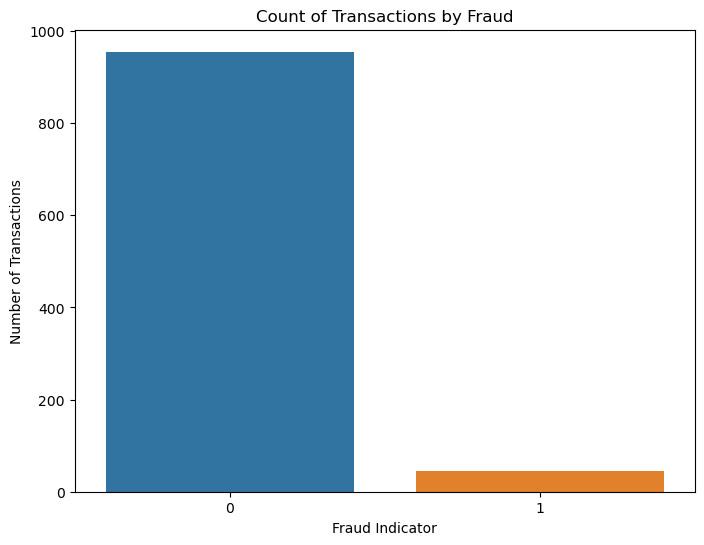

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x=suspicious_counts.index, y=suspicious_counts.values)
plt.title('Count of Transactions by Fraud')
plt.xlabel('Fraud Indicator')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()
# data is imbalanced

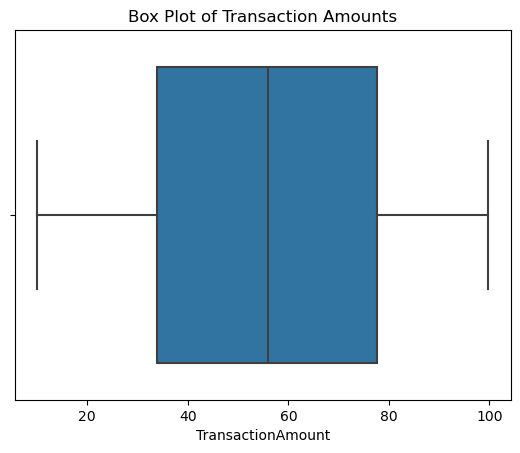

In [103]:
sns.boxplot(x=cust_trans['TransactionAmount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()
# no outliers in transaction amounts

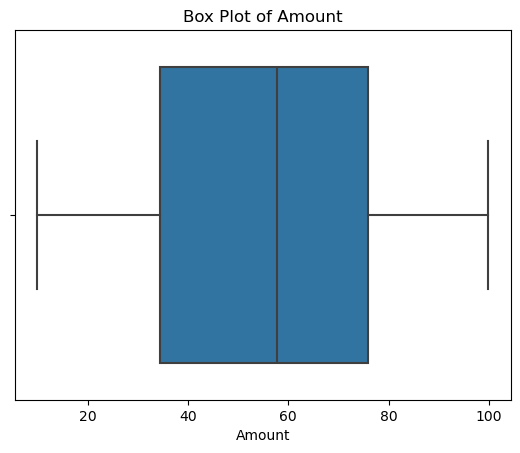

In [104]:
sns.boxplot(x=cust_trans['Amount'])
plt.title('Box Plot of Amount')
plt.show()
# no outliers in amounts


In [105]:
# Remove non-numerical columns
cust_numerical = cust_trans.select_dtypes(include='number')

In [106]:
# Calculate correlation matrix
correlation_matrix = cust_numerical.corr()
print(correlation_matrix['FraudIndicator'].sort_values(ascending=False))

FraudIndicator       1.000000
SuspiciousFlag       0.057932
CustomerID           0.055430
Amount               0.014625
Hour                 0.010737
MerchantID          -0.000528
AccountBalance      -0.004391
Age                 -0.021468
TransactionAmount   -0.033456
TransactionID       -0.035885
AnomalyScore        -0.048198
Name: FraudIndicator, dtype: float64


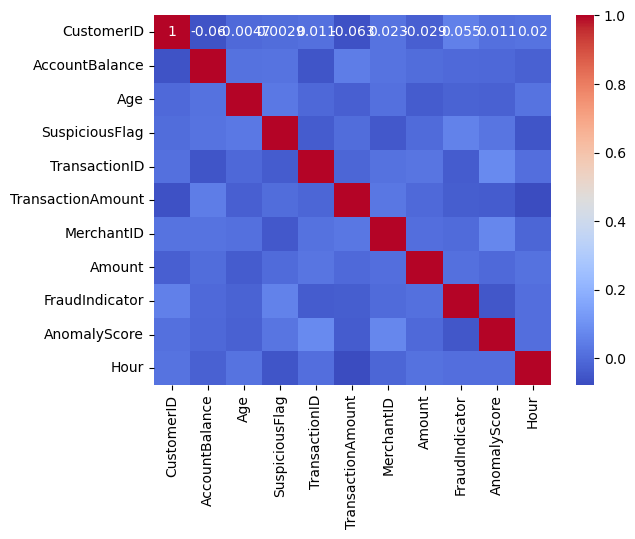

In [107]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# weak correlations

In [108]:
# dropping unnecssary columns
cust_trans_drop= cust_trans.drop(columns=['TransactionID', 'Age', 'CustomerID','Address', 'Name', 'MerchantID', 'Location','MerchantName'], axis= 1)

In [109]:
cust_trans_drop['FraudIndicator'].value_counts()

FraudIndicator
0    955
1     45
Name: count, dtype: int64

In [110]:
cust_trans_drop['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    975
1     25
Name: count, dtype: int64

In [111]:
cust_trans_drop['Category'].value_counts()

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

In [112]:
cust_trans_drop['Timestamp']= pd.to_datetime(cust_trans_drop['Timestamp'])

In [113]:
cust_trans_drop['LastLogin']=pd.to_datetime(cust_trans_drop['LastLogin'])

In [114]:
cust_trans_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AccountBalance     1000 non-null   float64       
 1   LastLogin          1000 non-null   datetime64[ns]
 2   SuspiciousFlag     1000 non-null   int64         
 3   TransactionAmount  1000 non-null   float64       
 4   Category           1000 non-null   object        
 5   Timestamp          1000 non-null   datetime64[ns]
 6   Amount             1000 non-null   float64       
 7   FraudIndicator     1000 non-null   int64         
 8   AnomalyScore       1000 non-null   float64       
 9   year_month         1000 non-null   period[M]     
 10  Hour               1000 non-null   int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(2), object(1), period[M](1)
memory usage: 82.2+ KB


In [115]:
# create new column - diffrenece btwn last logon and transaction
cust_trans_drop['Time_diff']= cust_trans_drop['Timestamp']- cust_trans_drop['LastLogin']

In [116]:
 # change to days only
cust_trans_drop['Time_diff'] = pd.to_timedelta(cust_trans_drop['Time_diff']).dt.days 

In [117]:
cust_trans_drop.head()

,AccountBalance,LastLogin,SuspiciousFlag,TransactionAmount,Category,Timestamp,Amount,FraudIndicator,AnomalyScore,year_month,Hour,Time_diff
0,9507.272060,2022-01-01,0,87.375444,Food,2022-02-02 18:00:00,33.670626,0,0.030921,2022-02,18,32
1,7268.827350,2023-03-17,0,71.337967,Food,2022-01-11 16:00:00,23.740319,0,0.555628,2022-01,16,-430
2,1715.321989,2022-01-03,0,46.044172,Travel,2022-01-27 16:00:00,30.980239,0,0.961552,2022-01,16,24
3,3101.509134,2022-01-04,0,85.085061,Other,2022-01-19 17:00:00,11.167088,0,0.525809,2022-01,17,15
4,6847.490921,2024-02-09,1,33.420638,Other,2022-01-26 12:00:00,16.182847,0,0.260799,2022-01,12,-744


In [118]:
Y= cust_trans_drop['FraudIndicator']


In [119]:
X= cust_trans_drop.drop(columns=['LastLogin','Timestamp', 'FraudIndicator'], axis=1)

In [120]:
Lable_encoder = LabelEncoder()

In [121]:
# FIT ANDTRANSFORM
X['Category']=Lable_encoder.fit_transform(X['Category'])

In [122]:
# there is class imbalance so resample
# Separate majority and minority classes
df_majority = cust_trans_drop[cust_trans_drop['FraudIndicator'] == 0]
df_minority = cust_trans_drop[cust_trans_drop['FraudIndicator'] == 1]

In [123]:
cust_trans_drop.head()

,AccountBalance,LastLogin,SuspiciousFlag,TransactionAmount,Category,Timestamp,Amount,FraudIndicator,AnomalyScore,year_month,Hour,Time_diff
0,9507.272060,2022-01-01,0,87.375444,Food,2022-02-02 18:00:00,33.670626,0,0.030921,2022-02,18,32
1,7268.827350,2023-03-17,0,71.337967,Food,2022-01-11 16:00:00,23.740319,0,0.555628,2022-01,16,-430
2,1715.321989,2022-01-03,0,46.044172,Travel,2022-01-27 16:00:00,30.980239,0,0.961552,2022-01,16,24
3,3101.509134,2022-01-04,0,85.085061,Other,2022-01-19 17:00:00,11.167088,0,0.525809,2022-01,17,15
4,6847.490921,2024-02-09,1,33.420638,Other,2022-01-26 12:00:00,16.182847,0,0.260799,2022-01,12,-744


In [124]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                  replace=True,     # Sample with replacement
                                  n_samples=len(df_majority),  # Match majority class
                                  random_state=42)  # Reproducible results

In [125]:
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced['FraudIndicator'].value_counts())

FraudIndicator
0    955
1    955
Name: count, dtype: int64


In [126]:
df_balanced.head()

,AccountBalance,LastLogin,SuspiciousFlag,TransactionAmount,Category,Timestamp,Amount,FraudIndicator,AnomalyScore,year_month,Hour,Time_diff
0,9507.272060,2022-01-01,0,87.375444,Food,2022-02-02 18:00:00,33.670626,0,0.030921,2022-02,18,32
1,7268.827350,2023-03-17,0,71.337967,Food,2022-01-11 16:00:00,23.740319,0,0.555628,2022-01,16,-430
2,1715.321989,2022-01-03,0,46.044172,Travel,2022-01-27 16:00:00,30.980239,0,0.961552,2022-01,16,24
3,3101.509134,2022-01-04,0,85.085061,Other,2022-01-19 17:00:00,11.167088,0,0.525809,2022-01,17,15
4,6847.490921,2024-02-09,1,33.420638,Other,2022-01-26 12:00:00,16.182847,0,0.260799,2022-01,12,-744


In [168]:
Y_scaled= df_balanced['FraudIndicator']

In [169]:
X_resampled=df_balanced.drop(columns=['LastLogin','Timestamp', 'FraudIndicator'], axis=1)

In [170]:
X_resampled['Category']=Lable_encoder.fit_transform(X_resampled['Category'])

In [171]:
X_resampled.head()

,AccountBalance,SuspiciousFlag,TransactionAmount,Category,Amount,AnomalyScore,year_month,Hour,Time_diff
0,9507.272060,0,87.375444,0,33.670626,0.030921,2022-02,18,32
1,7268.827350,0,71.337967,0,23.740319,0.555628,2022-01,16,-430
2,1715.321989,0,46.044172,4,30.980239,0.961552,2022-01,16,24
3,3101.509134,0,85.085061,2,11.167088,0.525809,2022-01,17,15
4,6847.490921,1,33.420638,2,16.182847,0.260799,2022-01,12,-744


In [177]:
X_resampled.drop(columns='year_month', inplace = True)

In [184]:
#  Instantiate the MinMaxScaler
scaler = StandardScaler()

#  Fit and Transform the Data
scaled_data = scaler.fit_transform(X_resampled)


# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(scaled_data, columns=X_resampled.columns)


In [185]:
X_scaled.head()

,AccountBalance,SuspiciousFlag,TransactionAmount,Category,Amount,AnomalyScore,Hour,Time_diff
0,1.527930,-0.209083,1.320795,-1.394986,-0.877231,-1.457401,0.874582,1.928957
1,0.637114,-0.209083,0.691254,-1.394986,-1.261844,0.301225,0.599679,0.299132
2,-1.572970,-0.209083,-0.301637,1.480809,-0.981433,1.661734,0.599679,1.900735
3,-1.021320,-0.209083,1.230887,0.042911,-1.748821,0.201284,0.737131,1.868985
4,0.469438,4.782782,-0.797165,0.042911,-1.554554,-0.686935,0.049871,-0.808585


In [186]:
X_scaled.head()

,AccountBalance,SuspiciousFlag,TransactionAmount,Category,Amount,AnomalyScore,Hour,Time_diff
0,1.527930,-0.209083,1.320795,-1.394986,-0.877231,-1.457401,0.874582,1.928957
1,0.637114,-0.209083,0.691254,-1.394986,-1.261844,0.301225,0.599679,0.299132
2,-1.572970,-0.209083,-0.301637,1.480809,-0.981433,1.661734,0.599679,1.900735
3,-1.021320,-0.209083,1.230887,0.042911,-1.748821,0.201284,0.737131,1.868985
4,0.469438,4.782782,-0.797165,0.042911,-1.554554,-0.686935,0.049871,-0.808585


In [187]:
# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [188]:
#  Create the Model
model = LogisticRegression(solver='liblinear')

In [189]:
#  Train the Model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [190]:
#  Make Predictions
y_pred = model.predict(X_test)

In [191]:
 #evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[112  83]
 [ 66 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       195
           1       0.59      0.65      0.62       187

    accuracy                           0.61       382
   macro avg       0.61      0.61      0.61       382
weighted avg       0.61      0.61      0.61       382

Accuracy Score: 0.6099476439790575


In [192]:
# the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 200, 300]  # Number of iterations
}

In [193]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [194]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [195]:
#  Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [196]:
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Hyperparameters:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       195
           1       0.59      0.65      0.62       187

    accuracy                           0.61       382
   macro avg       0.61      0.61      0.61       382
weighted avg       0.61      0.61      0.61       382

Accuracy Score: 0.6073298429319371


In [202]:
def evaluate_classification_models(X_resampled, y_resampled):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Define a dictionary of classification models
    models = {
        "Logistic Regression Classifier": LogisticRegression(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(),
        "XGB Boost": xgb.XGBClassifier(),
        "Support Vector Machine (SVM)": SVC(),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier()
        
          }
    
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": confusion
        }
    
    return results

In [203]:
results = evaluate_classification_models(X_scaled, Y_scaled)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()

Results for Logistic Regression Classifier:
Accuracy: 0.6099476439790575
Precision: 0.5931372549019608
Recall: 0.6470588235294118
F1 Score: 0.618925831202046
Confusion Matrix: [[112  83]
 [ 66 121]]

Results for Naive Bayes:
Accuracy: 0.5575916230366492
Precision: 0.6153846153846154
Recall: 0.25668449197860965
F1 Score: 0.36226415094339626
Confusion Matrix: [[165  30]
 [139  48]]

Results for Decision Tree Classifier:
Accuracy: 0.981675392670157
Precision: 0.9639175257731959
Recall: 1.0
F1 Score: 0.9816272965879265
Confusion Matrix: [[188   7]
 [  0 187]]

Results for Random Forest Classifier:
Accuracy: 0.9973821989528796
Precision: 0.9946808510638298
Recall: 1.0
F1 Score: 0.9973333333333333
Confusion Matrix: [[194   1]
 [  0 187]]

Results for XGB Boost:
Accuracy: 0.9842931937172775
Precision: 0.9689119170984456
Recall: 1.0
F1 Score: 0.9842105263157895
Confusion Matrix: [[189   6]
 [  0 187]]

Results for Support Vector Machine (SVM):
Accuracy: 0.8638743455497382
Precision: 0.8
Recall

In [223]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

In [224]:
# Fit the model on the training data
model.fit(X_train)

C:\Users\vincent.chaparadza\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [225]:
# Predict on the test set
y_pred = model.predict(X_test)

In [226]:
# The prediction returns -1 for outliers (fraud) and 1 for inliers (normal)
# Convert predictions to match the label format (0 and 1)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [227]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[180  15]
 [175  12]]
              precision    recall  f1-score   support

           0       0.51      0.92      0.65       195
           1       0.44      0.06      0.11       187

    accuracy                           0.50       382
   macro avg       0.48      0.49      0.38       382
weighted avg       0.48      0.50      0.39       382

